## Now we implement Prophet model for timeseries forcasting

In [14]:
import pandas as pd 
from prophet import Prophet
import matplotlib.pyplot as plt


df = pd.read_csv('../data/cleaned/toyota_stock.csv', parse_dates=['Date'])
df_prophet = df[['Date','Close']].rename(columns={'Date':'ds', 'Close':'y'})

## Fit the Prophet model

In [15]:
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

13:09:10 - cmdstanpy - INFO - Chain [1] start processing
13:09:19 - cmdstanpy - INFO - Chain [1] done processing


## Forcast future


In [16]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

### Displaying Forcast plot and Trend & Seasonality components

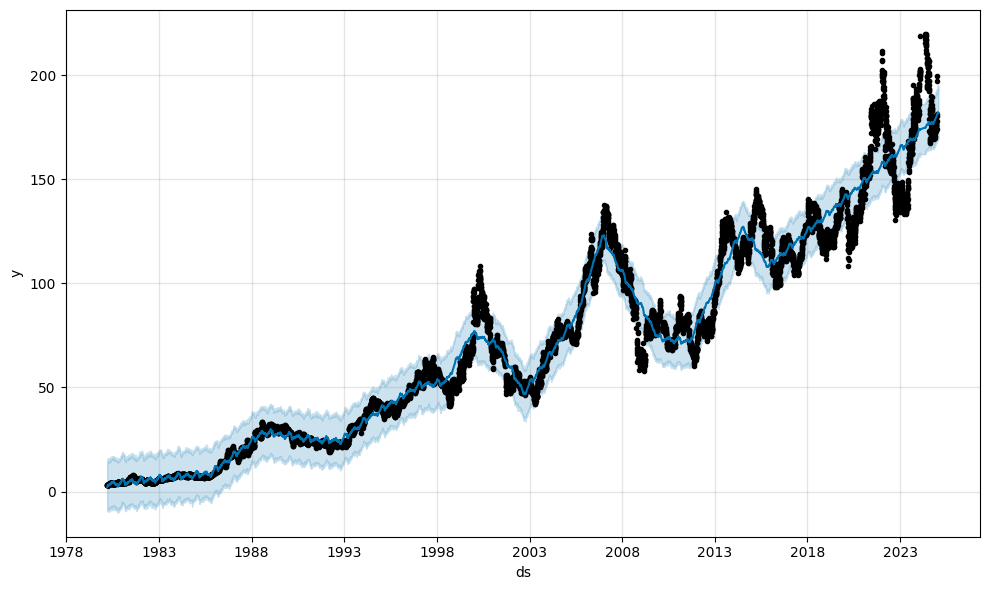

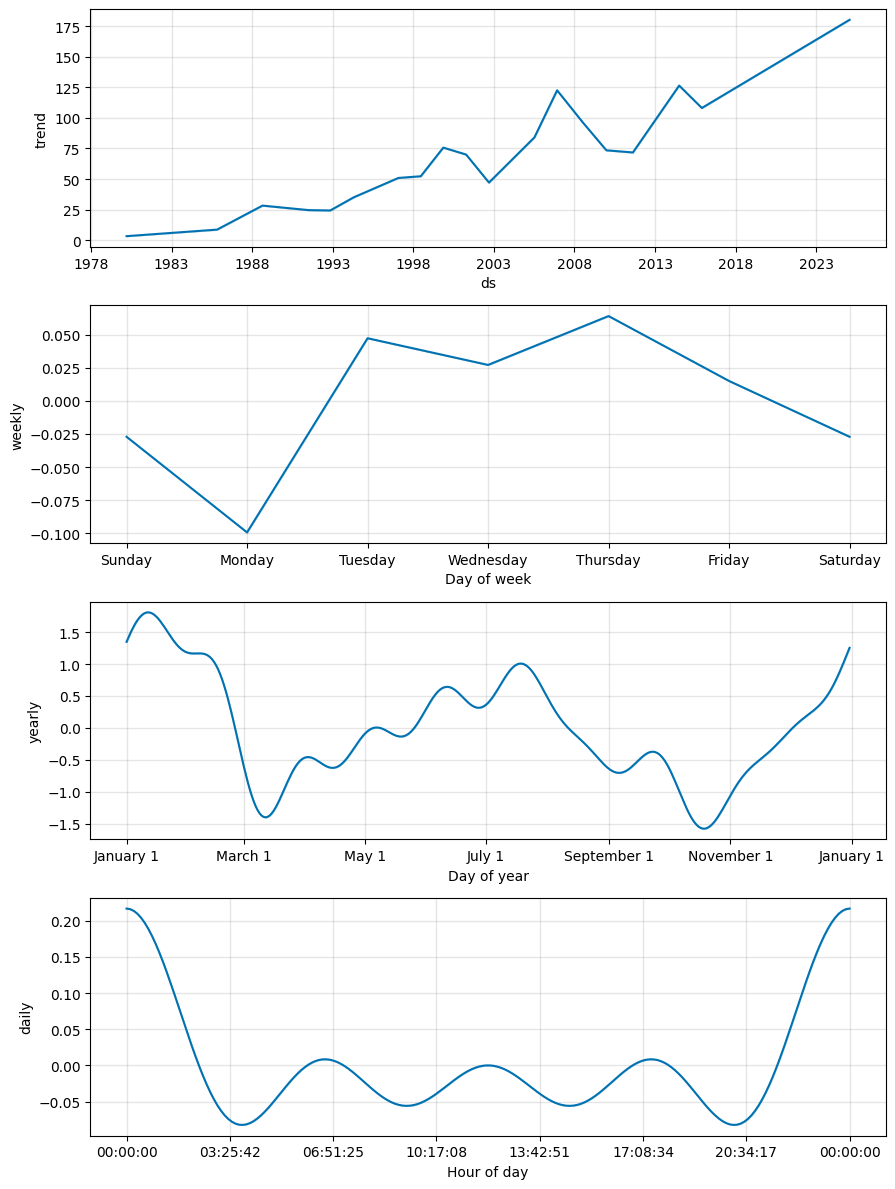

In [17]:
import matplotlib.pyplot as plt
fig1 = model.plot(forecast)
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
test = df_prophet['y'][-30:].reset_index(drop=True)
pred = forecast['yhat'][-30:].reset_index(drop=True)

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))


print("Prophet MAE:", mae)
print("Prophet RMSE:", rmse)

Prophet MAE: 7.2690347392630015
Prophet RMSE: 8.044043314841597


In [19]:
import pickle
# Save ARIMA model
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)